In [83]:
import numpy as np
from scipy import stats
import pandas as pd
import math 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import f
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.utils import resample
import statsmodels.stats.multitest as smt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
#from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier

In [84]:
data = pd.read_excel('PD_data.xlsx')
data.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [85]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


In [86]:
data.shape

(195, 24)

In [87]:
num_cols = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)','MDVP:Jitter(%)', 
            'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 
            'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 
            'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE', 'status']

In [88]:
corr_matrix = data[num_cols].corr()

# compute the p-values for the correlation coefficients
p_values = data[num_cols].corr(method=lambda x, y: stats.pearsonr(x, y)[1].round(3)) - np.eye(len(num_cols))

In [89]:
# variation_freq = ['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']
# variation_amp = ['MDVP:Shimmer', 'MDVP:Shimmer(dB)','Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA']
# fund_freq_vars = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'status']

In [90]:
def count_outliers_iqr(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    upper_threshold = q3 + 1.5 * iqr
    lower_threshold = q1 - 1.5 * iqr
    num_outliers = sum((column > upper_threshold) | (column < lower_threshold))
    return num_outliers

for col in num_cols:
    num_outliers = count_outliers_iqr(data[col])
    print(f"Number of outliers in {col}: {num_outliers}")

Number of outliers in MDVP:Fo(Hz): 0
Number of outliers in MDVP:Fhi(Hz): 11
Number of outliers in MDVP:Flo(Hz): 9
Number of outliers in MDVP:Jitter(%): 14
Number of outliers in MDVP:Jitter(Abs): 7
Number of outliers in MDVP:RAP: 14
Number of outliers in MDVP:PPQ: 15
Number of outliers in Jitter:DDP: 14
Number of outliers in MDVP:Shimmer: 8
Number of outliers in MDVP:Shimmer(dB): 10
Number of outliers in Shimmer:APQ3: 6
Number of outliers in Shimmer:APQ5: 13
Number of outliers in MDVP:APQ: 12
Number of outliers in Shimmer:DDA: 6
Number of outliers in NHR: 19
Number of outliers in HNR: 3
Number of outliers in RPDE: 0
Number of outliers in DFA: 0
Number of outliers in spread1: 4
Number of outliers in spread2: 2
Number of outliers in D2: 1
Number of outliers in PPE: 5
Number of outliers in status: 48


In [91]:
data['MDVP:F_Spd'] = data['MDVP:Fhi(Hz)'] -data['MDVP:Fhi(Hz)']

# Scaling Average vocal fundamental frequency

In [92]:
data['MDVP:Fo(Hz)'] = data['MDVP:Fhi(Hz)'] + data['MDVP:Flo(Hz)'] 
data['MDVP:Fo(Hz)'] = data['MDVP:Fo(Hz)']/2
data['MDVP:Fo(Hz)']


0      116.1495
1      131.2345
2      121.3330
3      124.6185
4      126.2180
         ...   
190    162.6195
191    171.2525
192    157.1460
193    235.9325
194    169.1250
Name: MDVP:Fo(Hz), Length: 195, dtype: float64

In [93]:
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE', 'MDVP:F_Spd'],
      dtype='object')

In [94]:
# Standardize the data in the new dataframe
scaler = StandardScaler()
df_scale = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scale, columns=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 
                                            'MDVP:Jitter(%)','MDVP:Jitter(Abs)', 'MDVP:RAP', 
                                            'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 
                                            'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
                                            'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 
                                            'spread1', 'spread2', 'D2', 'PPE', 'MDVP:F_Spd'])

In [95]:
df_scaled = df_scaled.drop(['MDVP:Jitter(%)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 
                          'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 
                          'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)'], axis = 1)

In [96]:
df_scaled.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Jitter(Abs)', 'MDVP:Shimmer', 'NHR', 'HNR', 'RPDE',
       'DFA', 'spread1', 'spread2', 'D2', 'PPE', 'MDVP:F_Spd'],
      dtype='object')

In [97]:
df_scaled['status'] = data['status'].copy()

In [98]:
# corr_matrix = df_scaled.corr()

# # compute the p-values for the correlation coefficients
# p_values = df_scaled.corr(method=lambda x, y: stats.pearsonr(x, y)[1].round(3)) - np.eye(len(df_scaled.columns))

In [99]:
# ftest_scaled_results = pd.DataFrame(columns=['Independent Variable', 'F-Statistic', 'p-value'])
# scale_cols = ['MDVP:Fo(Hz)', 'MDVP:Jitter(Abs)', 'MDVP:Shimmer', 'NHR', 'HNR', 'RPDE','DFA', 
#               'spread1', 'spread2', 'D2', 'PPE', 'MDVP:F_Spd']

# # Iterate over the columns in the DataFrame and apply the f_test function to each one
# for col in scale_cols:
#     f_stat, p_value = f_test(df_scaled, col, 'status')
#     ftest_scaled_results = ftest_scaled_results.append({'Independent Variable': col, 'F-Statistic': f_stat, 'p-value': p_value}, ignore_index=True)

# # Print the results table
# print(ftest_scaled_results)


# Applying Dimensionality Reduction Techniques such as PCA

In [100]:
df_pc = data
df_pc.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE', 'status', 'MDVP:F_Spd'],
      dtype='object')

In [101]:
df_pc = df_pc.drop(['name'], axis = 1)

In [102]:
freq_var = ['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']
df_pc1 = df_pc[freq_var]  

In [103]:
df_pc1 = scaler.fit_transform(df_pc1)
df_pc1

array([[ 3.34913859e-01,  7.49759461e-01,  1.32962547e-01,
         7.60800232e-01,  1.31755322e-01],
       [ 7.15418253e-01,  1.03767418e+00,  4.53891693e-01,
         1.27680862e+00,  4.52683706e-01],
       [ 8.84990863e-01,  1.32558890e+00,  7.20769613e-01,
         1.58568688e+00,  7.21813123e-01],
       [ 7.75389054e-01,  1.32558890e+00,  5.78885149e-01,
         1.28407634e+00,  5.77676867e-01],
       [ 1.36889319e+00,  1.90141834e+00,  1.09574998e+00,
         2.04718734e+00,  1.09679260e+00],
       [ 7.15418253e-01,  1.03767418e+00,  4.47135289e-01,
         1.47303716e+00,  4.45927319e-01],
       [-5.97735498e-01, -4.01899420e-01, -5.93350781e-01,
        -5.18319151e-01, -5.92304156e-01],
       [-6.86657720e-01, -4.01899420e-01, -6.30510998e-01,
        -5.90996388e-01, -6.31716413e-01],
       [-1.46920509e-01,  4.61844741e-01, -1.27158970e-01,
        -4.59171060e-02, -1.26113450e-01],
       [-1.86211724e-01,  4.61844741e-01, -2.11614009e-01,
        -4.59171060e-02

In [104]:
#Applying Principal Component Analysis
pca = PCA()
pca.fit(df_pc1)
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[9.64162746e-01 2.33046731e-02 1.11199310e-02 1.41256948e-03
 7.99702317e-08]


In [105]:
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_explained_variance_ratio >= 0.95) + 1
print(num_components)

1


In [106]:
eigenvalues = pca.explained_variance_
print(eigenvalues)

[4.84566329e+00 1.17124001e-01 5.58862511e-02 7.09925385e-03
 4.01912247e-07]


In [107]:
pca = PCA(n_components=num_components)
pca_data = pca.fit_transform(df_pc1)

In [108]:
pca_data = pd.DataFrame(pca_data, columns = ['Jitter_pc'])
df_pc1 = pd.DataFrame(df_pc1, columns = ['MDVP:Jitter(%)','MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP'])
pca_data

,Jitter_pc
0,0.934818
1,1.751692
2,2.333009
3,2.020036
4,3.346368
...,...
190,-0.671672
191,-0.312219
192,2.393083
193,0.254103


In [109]:
df_pc['Jitter_pc'] = pca_data['Jitter_pc']

In [110]:
df_pc.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE', 'status', 'MDVP:F_Spd', 'Jitter_pc'],
      dtype='object')

In [111]:
variation_amp = ['MDVP:Shimmer', 'MDVP:Shimmer(dB)','Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA']

pca2 = PCA()
df_pc2 = df_pc[variation_amp]
df_pc2 = scaler.fit_transform(df_pc2)

pca2.fit(df_pc2)
explained_variance_ratio = pca2.explained_variance_ratio_
print(explained_variance_ratio)

[9.67891293e-01 2.39668230e-02 4.97378202e-03 2.88262892e-03
 2.85467090e-04 6.01341259e-09]


In [112]:
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_explained_variance_ratio >= 0.95) + 1
print(num_components)

1


In [113]:
eigenvalues = pca2.explained_variance_
print(eigenvalues)

[5.83728254e+00 1.44542180e-01 2.99965204e-02 1.73849270e-02
 1.72163142e-03 3.62664574e-08]


In [114]:
pca2 = PCA(n_components=num_components)
data_transformed2 = pca2.fit_transform(df_pc2)

In [115]:
data_transformed2 = pd.DataFrame(data_transformed2, columns = ['Shimmer_pc'])
df_pc2 = pd.DataFrame(df_pc2, columns = ['MDVP:Shimmer', 'MDVP:Shimmer(dB)','Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA'])

In [116]:
df_pc['Shimmer_pc'] = data_transformed2['Shimmer_pc']

In [117]:
df_pc = df_pc.drop(['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
                    'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
                    'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
                    'MDVP:APQ', 'Shimmer:DDA'], axis = 1)

In [118]:
df_pc.head(7)

,MDVP:Fo(Hz),NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status,MDVP:F_Spd,Jitter_pc,Shimmer_pc
0,116.1495,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1,0.0,0.934818,1.700278
1,131.2345,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1,0.0,1.751692,4.081638
2,121.3330,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1,0.0,2.333009,2.865896
3,124.6185,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1,0.0,2.020036,3.224675
4,126.2180,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1,0.0,3.346368,4.471558
5,122.4745,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775,1,0.0,1.832739,2.152991
6,126.0320,0.00607,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756,1,0.0,-1.211720,-1.775359


In [119]:
X = df_pc.drop(['status'], axis=1)
y = df_pc['status']

In [120]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.25, random_state=1)

### Decision Tree

In [121]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predDT = clf.predict(X_test)

print(predDT)
accuracy = accuracy_score(y_test,predDT)*100
print("\nAccuracy of Model:",accuracy)

[1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1]

Accuracy of Model: 89.79591836734694


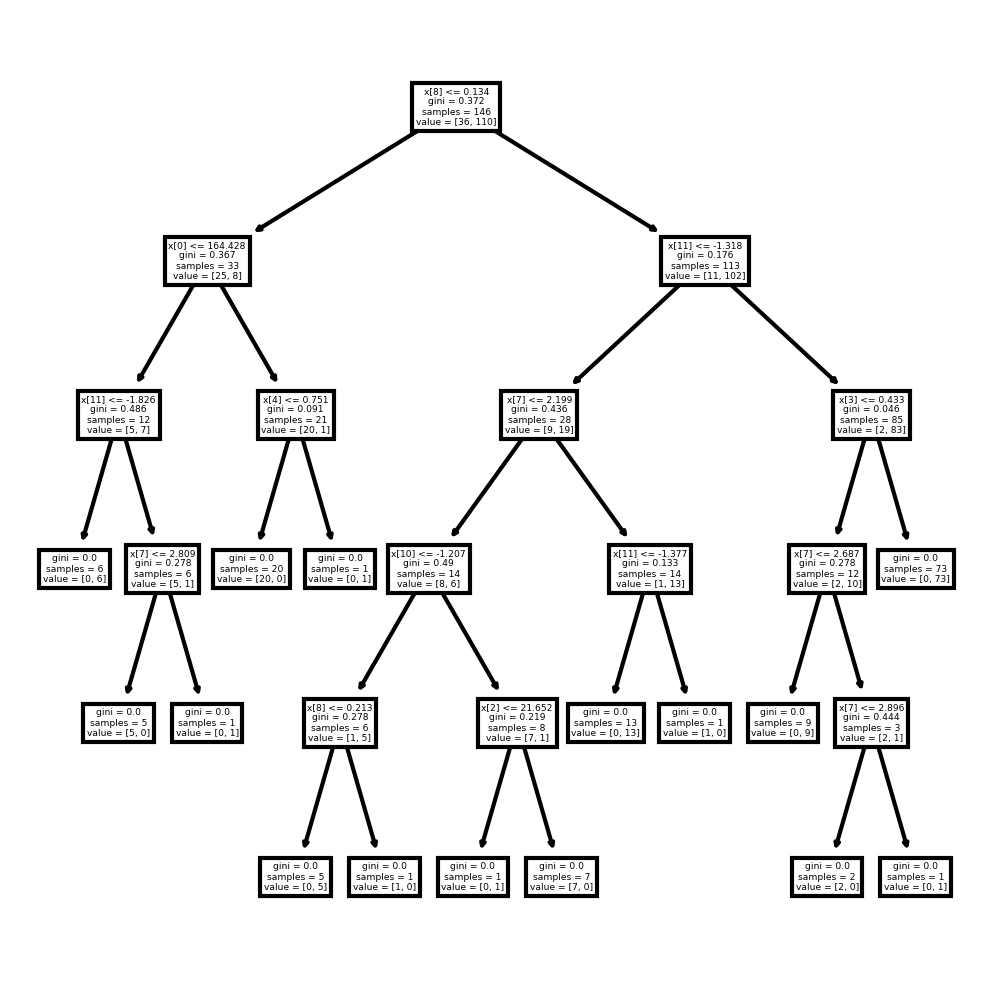

In [122]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,filled = True);
fig.savefig('imagename.png')
tree.plot_tree(clf);    

# Random forest

In [123]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predRF = rfc.predict(X_test)

accuracy = accuracy_score(y_test,predRF)*100
print("Accuracy of Model is:",accuracy)

Accuracy of Model is: 91.83673469387756


# XG-Boost

In [124]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [125]:
predXGB =  xgb_classifier.predict(X_test)

print(predXGB)
print("\nAccuracy of Model::",accuracy_score(y_test,predXGB))

[1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0
 1 0 1 0 1 1 0 1 1 1 1 1]

Accuracy of Model:: 0.9183673469387755
